In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv("DataSet/housing.csv")

In [17]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [20]:
data.dropna(inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [22]:
from sklearn.model_selection import train_test_split
# x is data frame without target variable
x = data.drop(['median_house_value'], axis = 1)
# y is target variable
y = data['median_house_value']


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
train_data = x_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17063,-122.23,37.49,11.0,840.0,329.0,1338.0,345.0,2.3333,NEAR OCEAN,241700.0
86,-122.27,37.81,40.0,880.0,451.0,582.0,380.0,0.9770,NEAR BAY,118800.0
7587,-118.23,33.90,34.0,2462.0,553.0,2334.0,502.0,1.6410,<1H OCEAN,96800.0
14390,-117.23,32.74,35.0,2615.0,525.0,1312.0,547.0,4.1339,NEAR OCEAN,238200.0
2296,-119.75,36.80,30.0,3308.0,662.0,1894.0,648.0,2.1970,INLAND,74500.0
...,...,...,...,...,...,...,...,...,...,...
10307,-117.82,33.90,25.0,1137.0,170.0,524.0,164.0,7.5744,<1H OCEAN,259300.0
19148,-122.69,38.34,15.0,3091.0,697.0,1602.0,682.0,4.0071,<1H OCEAN,135500.0
1745,-122.35,37.95,31.0,2449.0,595.0,1801.0,548.0,2.6328,NEAR BAY,110300.0
13361,-117.61,34.01,25.0,352.0,41.0,99.0,34.0,3.9696,INLAND,500000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

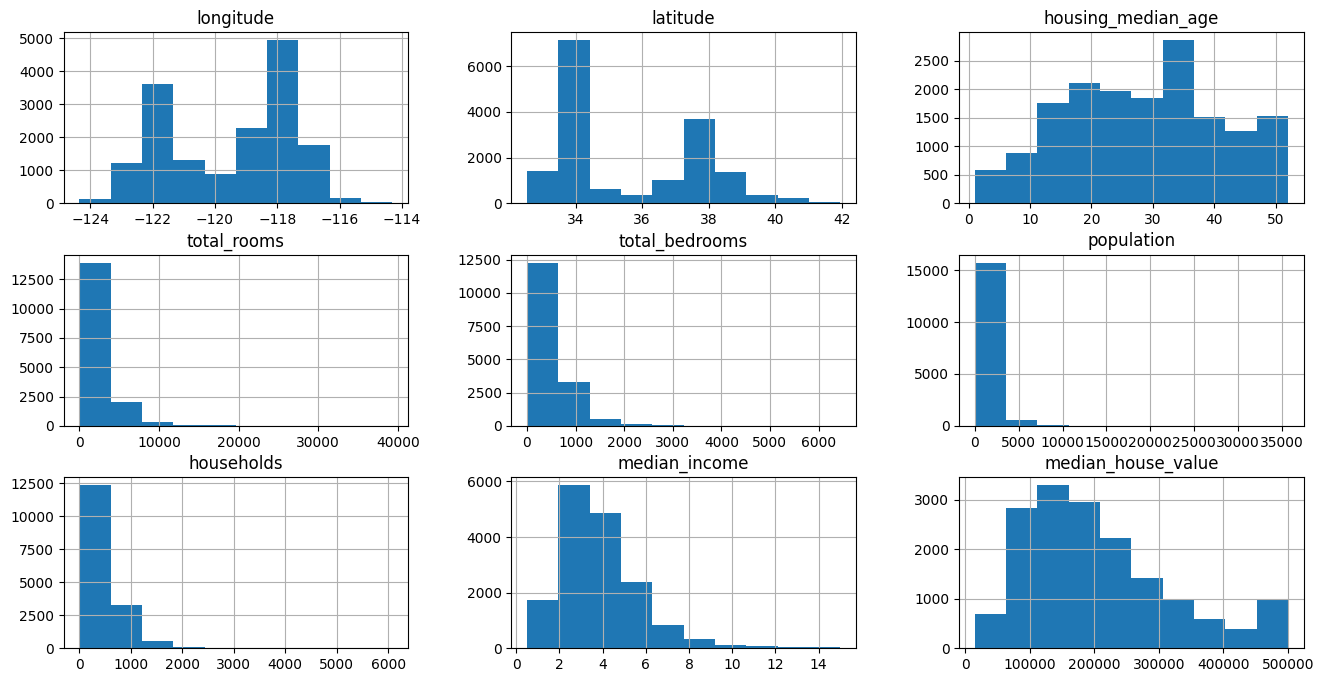

In [12]:
train_data.hist(figsize=(16,8))

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17063,-122.23,37.49,11.0,840.0,329.0,1338.0,345.0,2.3333,NEAR OCEAN,241700.0
86,-122.27,37.81,40.0,880.0,451.0,582.0,380.0,0.9770,NEAR BAY,118800.0
7587,-118.23,33.90,34.0,2462.0,553.0,2334.0,502.0,1.6410,<1H OCEAN,96800.0
14390,-117.23,32.74,35.0,2615.0,525.0,1312.0,547.0,4.1339,NEAR OCEAN,238200.0
2296,-119.75,36.80,30.0,3308.0,662.0,1894.0,648.0,2.1970,INLAND,74500.0
...,...,...,...,...,...,...,...,...,...,...
10307,-117.82,33.90,25.0,1137.0,170.0,524.0,164.0,7.5744,<1H OCEAN,259300.0
19148,-122.69,38.34,15.0,3091.0,697.0,1602.0,682.0,4.0071,<1H OCEAN,135500.0
1745,-122.35,37.95,31.0,2449.0,595.0,1801.0,548.0,2.6328,NEAR BAY,110300.0
13361,-117.61,34.01,25.0,352.0,41.0,99.0,34.0,3.9696,INLAND,500000.0


In [31]:
train_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924688,-0.112810,0.042627,0.069461,0.099395,0.056352,-0.015317,-0.046456
latitude,-0.924688,1.000000,0.018101,-0.033454,-0.065890,-0.106850,-0.070539,-0.080035,-0.143868
housing_median_age,-0.112810,0.018101,1.000000,-0.362995,-0.323327,-0.296388,-0.306286,-0.120916,0.101883
total_rooms,0.042627,-0.033454,-0.362995,1.000000,0.932298,0.853751,0.919558,0.192634,0.130096
total_bedrooms,0.069461,-0.065890,-0.323327,0.932298,1.000000,0.874240,0.979101,-0.011537,0.047116
population,0.099395,-0.106850,-0.296388,0.853751,0.874240,1.000000,0.904176,0.000225,-0.029452
households,0.056352,-0.070539,-0.306286,0.919558,0.979101,0.904176,1.000000,0.009541,0.061975
median_income,-0.015317,-0.080035,-0.120916,0.192634,-0.011537,0.000225,0.009541,1.000000,0.688837
median_house_value,-0.046456,-0.143868,0.101883,0.130096,0.047116,-0.029452,0.061975,0.688837,1.000000


<Axes: >

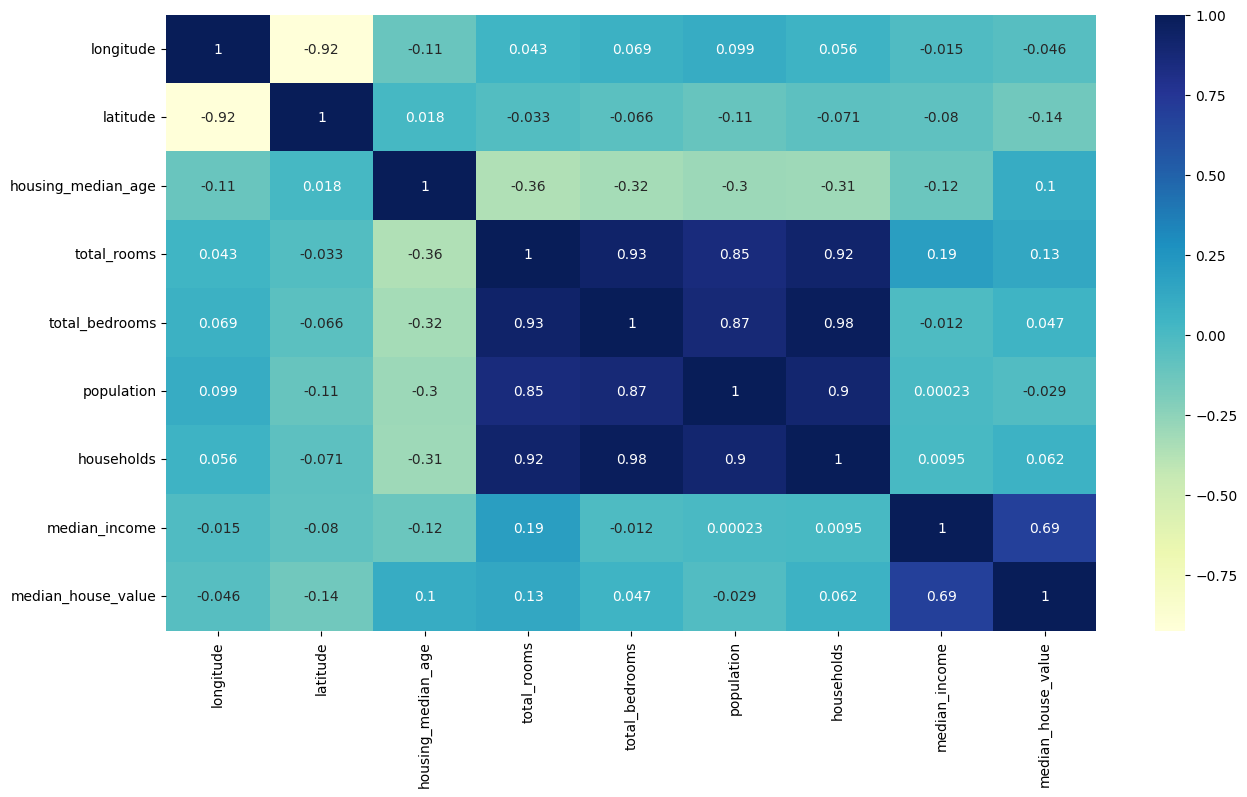

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap= "YlGnBu")